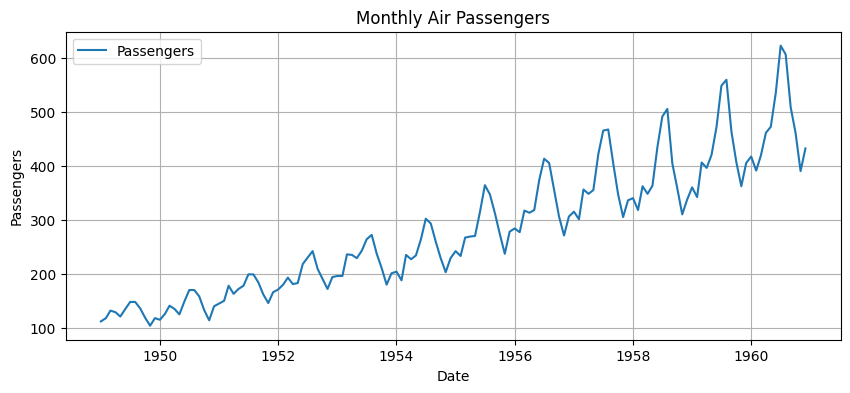

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


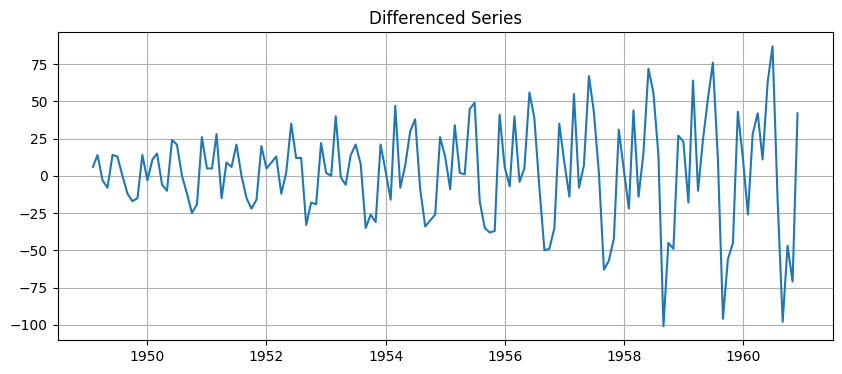

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 11 Apr 2025   AIC                           1353.347
Time:                        13:00:38   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

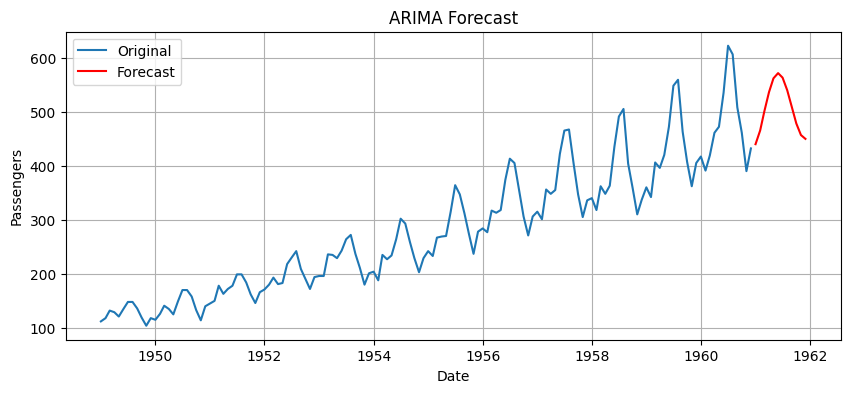

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load your uploaded dataset
file_path = "/content/airline-passengers.csv"
data = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')
data.columns = ['Passengers'] # Rename column if needed

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(data, label='Passengers')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Stationarity test using ADF
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] <= 0.05

is_stationary = adf_test(data['Passengers'])

# Differencing if needed
if not is_stationary:
    data_diff = data['Passengers'].diff().dropna()
    plt.figure(figsize=(10, 4))
    plt.plot(data_diff, label='Differenced Passengers')
    plt.title('Differenced Series')
    plt.grid(True)
    plt.show()
else:
    data_diff = data['Passengers']

# Fit ARIMA model (example order (2,1,2))
model = ARIMA(data['Passengers'], order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Passengers'], label='Original')
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()
